# CAPSTONE PROJECT MODUL 2 (DATA ANALYSIS)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, spearmanr, kruskal


import warnings
warnings.filterwarnings("ignore")

# Background
# Amazon AWS SaaS Sales Data Analysis

Dataset ini berisi data transaksi dari perusahaan Saas (Software as service) fiktif yang menjual perangkat lunak ke perusahaan lain secara (B2B). Di dataset ini setiap baris mewakili data dari tiap transaksi. Berikut adalah kolom dari dataset tersebut:



* Row ID : ID unik dari tiap transaksi
* Order ID : ID unik dari tiap pemesanan
* Order Date : Tanggal dilakukannya pemesanan
* Date Key : Representasi tanggal pemesanan dalam bentuk numerik (YYYYMMDD)
* Contact Name : Nama orang yang melakukan pemesanan
* Country : Negara asal pemesanan
* City : Kota asal pemesanan
* Region : Wilayah bisnis asal pemesanan
* Subregion : Sub wilayah bisnis asal pemesanan
* Customer : Nama perusahaan yang memesan
* Customer ID : ID unik dari setiap customer
* Industry : Bidang industri dari perusahaan yang memesan
* Segment : Segment customer (SMB, Strategic, Enterprise, etc)
* Product : Produk yang dipesan
* License : License key dari produk
* Sales : Total penjualan dari transaksi tersebut
* Quantity : Banyaknya item dalam transaksi
* Discount : Diskon yang berlaku dalam transaksi
* Profit : Keuntungan yang diperoleh dari transaksi tersebut




Berikut 5 baris teratas dari dataset SaaS-Sales :

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# Data Understanding dan Cleaning

Setelah memahami isi dari tiap kolom data, kita perlu tahu anomali apa yang terdapat dari dataset dan apabila ditemukan anomali tersebut maka perlu dilakukan data cleansing.

## Melihat isi data

Berikut adalah tipe data dari masing-masing kolom:

In [3]:
df.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

* Column Order Date berbentuk object, sebaiknya kita nanti rubah menjadi tipe data DateTime agar memudahkan dalam proses visualisasi nanti

* Column Customer ID dalam bentuk integer, sebaiknya kita rubah dalam bentuk object karena nilai tersebut bukanlah diskrit maupun kontinus

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## Menghapus kolom yang redundant

Agar mempermudah kita dalam menganalisa dan mencari insight dari data kita bisa menghapus kolom-kolom yang dinilai tidak relevan dalam proses data analysis

## Kolom Row ID
Row ID dalam data tersebut adalah identifier baris data, dimana dikarenakan sudah ada kolom Order ID maka sifat unik dari Row ID tidak lagi relevan dalam data analysis kedepannya

In [5]:
df = df.drop(columns=['Row ID'])

### Kolom Date Key

Date key dalam data tersebut adalah representasi numerik dari Order date, karena sudah ada Order Date yang menyediakan informasi waktu maka column Date Key dinilai redundant, maka dari ini kita dapat menghapus kolom Date Key

In [6]:
df = df.drop(columns=['Date Key'])

### Kolom license
License dalam data tersebut adalah license key dari produk yang tidak akan relevan dengan proses analisa data kita kedepannya, maka dari itu kita bisa menghapus kolom licenses

In [7]:
df = df.drop(columns=['License'])

## Merubah Tipe data Kolom
Sebelum melihat waktu kita sebaiknya merubah tipe data Order Date dari object menjadi datetime

### Kolom Order Date
Mengganti kolom Order Date bertipe object menjadi bertipe datetime

In [8]:
dfDate = pd.to_datetime(df['Order Date'])
dfDate

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [9]:
df['Order Date'] = dfDate

### Kolom Customer ID
Merubah column customer id dari integer menjadi object

In [10]:
df['Customer ID'] = df['Customer ID'].apply(str)

## Missing values

In [11]:
df.isna().sum()

Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Terlihat bahwa dataset tidak memiliki satupun data yang kosong

## Unique values

In [12]:
df.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Customer ID       99
Industry          10
Segment            3
Product           14
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Dari menggunanakan nunique() diatas kita mendapat informasi :

* Row ID memiliki         6425
* Order ID memiliki      3206
* Order Date memiliki     1110
* Date Key memiliki      1110
* Contact Name memiliki    776
* Country memiliki          47
* City memiliki            248
* Region memiliki            3
* Subregion memiliki        12
* Customer  memiliki        99
* Customer ID memiliki      99
* Industry memiliki         10
* Segment    memiliki        3
* Product   memiliki        14
* License    memiliki     6425
* Sales       memiliki    4294
* Quantity    memiliki      14
* Discount   memiliki       12
* Profit    memiliki      5116

## Duplicated Data

In [13]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
3405,AMER-2020-150119,2020-04-23,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,2020-04-23,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


Ditemukan 1 data yang duplikat, maka langkah yang akan dilakukan adalah menghapus data duplikat tersebut

Data duplikat berada pada index 3406, maka kita dapat langsung menghapus data berindex 3406

In [14]:
df = df.drop(index=3406)

## Cek Rentang Waktu Penjualan

In [15]:
firstDate = df.sort_values(by='Order Date')
display(firstDate[['Order Date']].head(1))
display(firstDate[['Order Date']].tail(1))

,Order Date
7980,2020-01-04


,Order Date
906,2023-12-31


Tanggal paling awal dari data adalah `2020-01-04` dalam format (YY-MM-DD)

Tanggal paling akhir dari data adalah 2023-12-31

Dapat disimpulkan bahwa rentang waktu dari data adalah dari `2020-01-04` sampai `2023-12-31`

## Cek apakah ada anomali di data Country, Region, Sub-region, dan City

In [16]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Ch..."
1,APJ,"[Japan, Australia, Philippines, India, Singapo..."
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, Fran..."


In [17]:
df.loc[df['Subregion'] == 'EMEA', 'Subregion'].unique()

array([], dtype=object)

In [18]:
df['Subregion'].unique()

array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

Tidak ditemukan anomali disini, semua negara sesuai dengan region masing-masing
* AMER = North, Central, and South America
* APJ = Asia-Pacific and japan
* EMEA  = Europe, Middle East, and Africa

In [19]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, I..."
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal,..."
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, ..."
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Ar..."
9,NAMER,"[United States, Canada]"


Tidak ada anomali disini, semua negara sesuai dengan subregionnya, sepertinya dengan menggunakan subregion ini kita bisa mengetahui segmentasi pasar, melihat subregion mana yang paling banyak membeli produk, subregion mana yang paling memberikan profit.

## Data Kategorikal


Data teratas dari data kategorik

In [20]:
kategorikal = df.select_dtypes(include = 'object')
kategorikal.head(3)

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product
0,EMEA-2022-152156,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite
1,EMEA-2022-152156,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub
2,AMER-2022-138688,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub


In [21]:
df['Customer ID'] = df['Customer ID'].apply(str)

## Data Numerik

Data teratas dari data numerik

In [22]:
numerikal = df.select_dtypes(include = 'number')
numerikal.head(3)

,Sales,Quantity,Discount,Profit
0,261.96,2,0.0,41.9136
1,731.94,3,0.0,219.5820
2,14.62,2,0.0,6.8714


In [23]:
df.select_dtypes(include=np.number)

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


Terdapat 7 Kolom numerikal, namun hanya ada 4 kolom numerikal yang bersifat kontinus, yaitu:
* Sales
* Quantity
* Discount
* Profit

In [24]:
numerikal.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Dari menggunakan describe() kita dapat melihat:

*   Range Kolom `Quantity`, `Sales`, dan `Diskon` berada pada nilai normal yaitu tidak ditemukan nilai minus pada kolom tersebut

* Pada `Sales` menunjukkan total nilai transaksi penjualan dan berdasarkan informasi diatas tidak ada nilai negatif pada kolom tersebut.

* `Quantity` berada pada range 1-14, tidak ada nilai negatif/0 pada kolom tersebut

* Pada `Discount` range data berada pada 0.0 - 0.8, angka tersebut normal untuk nilai diskon

* Standar deviasi dari kolom `Sales`dan `Profit` sangat tinggi, menunjukkan persebaran data yang lebih lebar, dapat diasumsikan bahwa kedua data tersebut memiliki outliers yang banyak

In [25]:
df['Order ID'].count()

9993

## Data Distribution

Melihat persebaran distribusi data numerik pada dataset

### Histogram

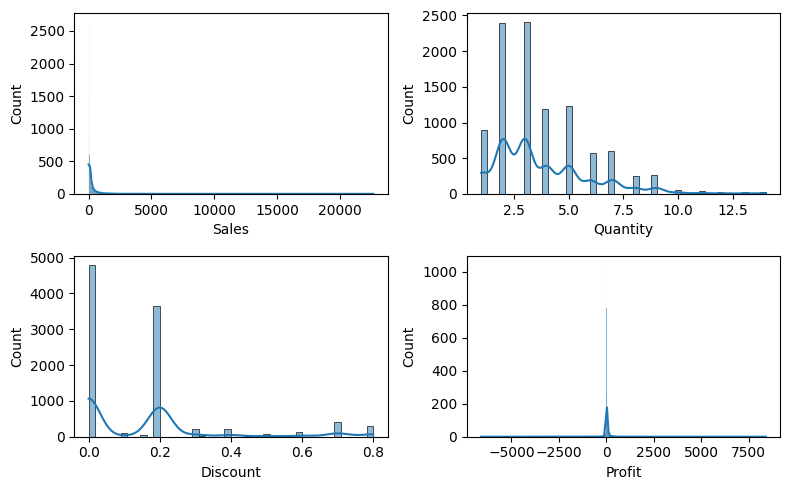

In [26]:
fig = plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
sns.histplot(df['Sales'], kde = True)
fig.tight_layout()

plt.subplot(2,2,2)
sns.histplot(df['Quantity'], kde = True)
fig.tight_layout()

plt.subplot(2,2,3)
sns.histplot(df['Discount'], kde = True)
fig.tight_layout()

plt.subplot(2,2,4)
sns.histplot(df['Profit'], kde = True)
fig.tight_layout()

*   `sales` tidak normal -> skew kanan
*   `quantity` tidak normal -> skew kanan
*   `Discount` tidak normal -> skew kanan
*   `Profit` meskipun bentuk histogram simetris namun masih banyak outliers yang menunjukkan bahwa masih banyak nilai ekstrim maka data tidak normal



### Boxplot

In [27]:
numerical = df[['Sales', 'Quantity', 'Discount', 'Profit']]

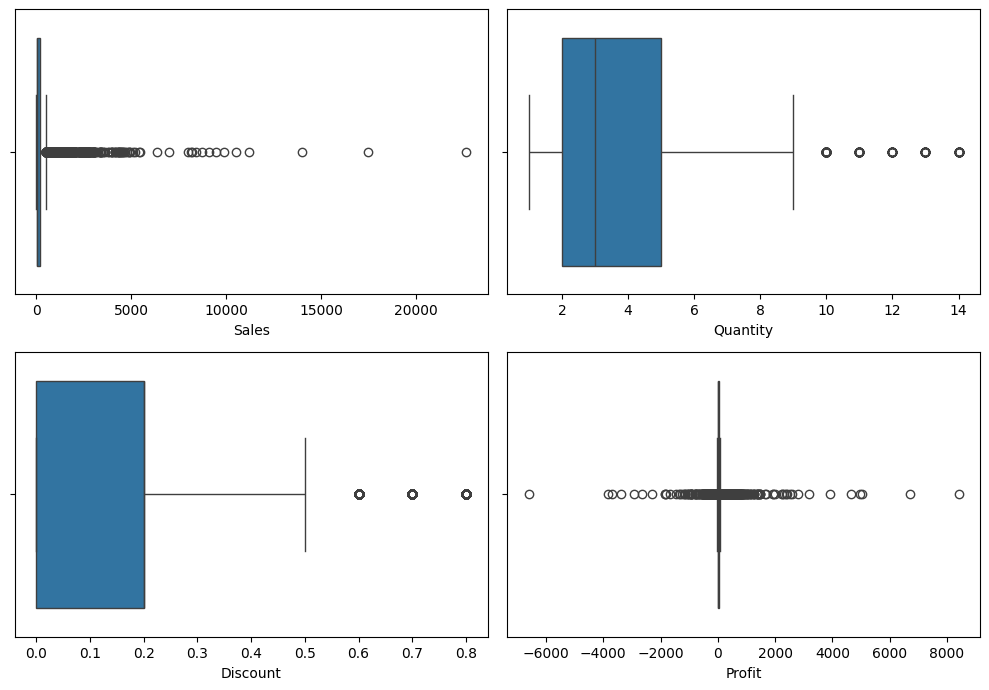

In [28]:
fig = plt.figure(figsize=(10,10)) # (horizontal, vertikal)
posisi = 1

for kolom in numerical.columns:
  plt.subplot(3,2,posisi) # (berapa baris, berapa kolom, di urutan ke berapa)
  sns.boxplot(x = numerical[kolom])
  fig.tight_layout()

  posisi += 1

plt.show()

* Sales
Transaksi yang umum terjadi ada di nilai nilai kecil, sementara itu juga masih banyak transaksi yang bernilai sangat besar, sehingga data menjadi skewed right.

* Quantity
Tiap transaksi umumnya terjadi pembelian dengan kuantitas produk yang cenderung kecil (2-5) banyak produk, namun juga ada data pembelian dengan kuantitas diatas 10 jumlah produk, jenis distribusi adalah skewed right

* Discount
Discount umumnya ada pada rentang nilai 0.0 - 0.2 namun juga ada pada nilai 0.6 keatas jenis distribusi data menjadi skewed right

* Profit
Bentuk distribusi dari profit dapat dikatakan simetris, namun ada banyak sekali nilai ekstrim yang menunjukkan adanya nilai minus profit dan nilai plus profit yang ekstrim sehingga data tidak dapat dikatakan normal


### Outliers

In [29]:
for kolom in numerical.columns:
  q1 = numerical[[kolom]].describe().loc['25%']
  q3 = numerical[[kolom]].describe().loc['75%']
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  jumlah_outliers = len(df[(numerical[kolom] < lower_bound) | (numerical[kolom] > upper_bound)])
  print(f'{kolom} memiliki outliers {jumlah_outliers}')

Sales memiliki outliers 1167
Quantity memiliki outliers 170
Discount memiliki outliers 856
Profit memiliki outliers 1881


Dapat dilihat bahwa data memiliki banyak sekali outliers, namun kita tidak dapat menghapus atau merubah data dari outliers tersebut karena bisa saja data tersebut saling bersangkutan

## Simpan Data yang sudah bersih ke CSV

In [30]:
df.to_csv(r"SaaS Clean.csv", index=False)

# Data Analysis

setelah proses data understanding dan cleaning selesai, maka selanjutnya adalah kita dapat menganalisa untuk mencari faktor faktor yang mempengaruhi profitability dari penjualan product SaaS dan memberikan rekomendasi untuk meningkatkan profitabilty dari penjualan tersebut.

Ada beberapa cara yang dapat kita lakukan untuk mencari faktor yang memengaruhi profitabilty dari penjualan, yaitu:

* Melihat produk apa saja yang paling banyak dibeli

* Melihat Profitabilty produk

* Menganalisa segmentasi customer


Perlu diperhatikan untuk data numerik, karena distribusi data yang cenderung tidak normal dan terdapat banyak sekali outlier yang harus tetap kita pertahankan maka kita akan menggunakan median sebagai ukuran nilai tengah pada data.

## Melihat produk apa yang paling banyak dibeli

In [31]:
topSales = df.groupby("Product")[["Order ID"]].count()
topSales.sort_values("Order ID", ascending=False)

,Order ID
Product,
ContactMatcher,1842
Support,1560
FinanceHub,980
SaaS Connector Pack,957
Site Analytics,889
Marketing Suite - Gold,846
ChatBot Plugin,796
Data Smasher,775
OneView,466


<Axes: xlabel='Product'>

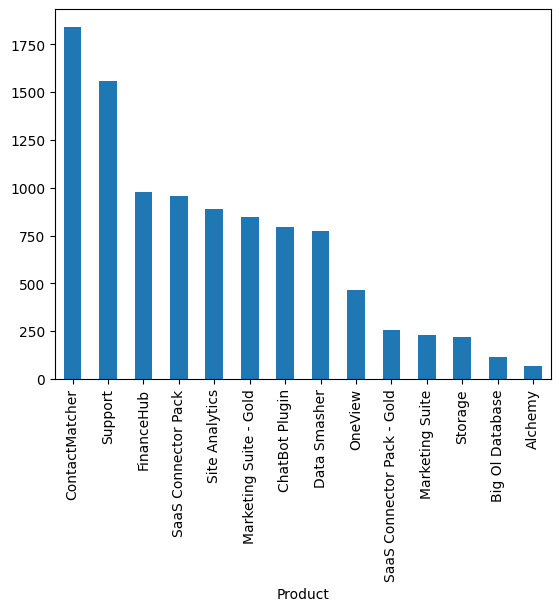

In [32]:
display(df.groupby('Product')['Sales'].count().sort_values(ascending=False).plot(kind='bar'))

ContactMatcher menjadi produk yang paling banyak dibeli, disusul oleh Support dan FinanceHub

## Cek Profit yang dihasilkan dari setiap produk

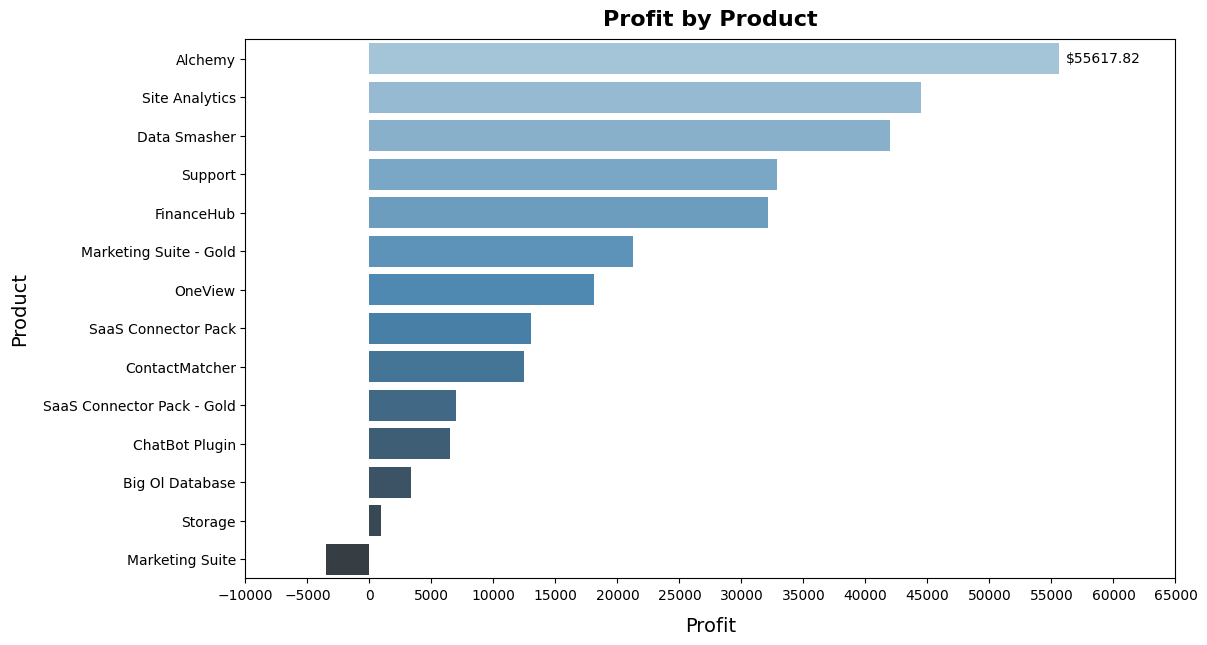

In [33]:
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=df,
    y="Product",
    x="Profit",
    ci=0,
    palette="Blues_d",
    estimator="sum",
    order=df.groupby("Product")[["Profit"]].sum().sort_values("Profit", ascending=False).index)
container = ax.containers[0]
profit_values = [f'${x:.2f}' for x in container.datavalues]
ax.bar_label(container, labels=profit_values, padding=5)
plt.title("Profit by Product", size=16, pad=10, fontweight='bold')
plt.xlabel("Profit", size=14, labelpad=10)
plt.ylabel("Product", size=14, labelpad=10)
plt.xticks(range(-10000, 65001, 5000))
plt.show()

Alchemy, Site Analaytics, dan Data Smasher, Support, Finance Hub, Marketing Suite Gold, dan OneView menjadi produk paling atas dalam profit.

Sedangkan Marketing Suite menjadi satu satunya produk yang berprofit minus.

Dari bar plot diatas muncul sebuah problem `Mengapa Marketing Suite mengalami kerugian?`

## Cek produk apa yang paling banyak diskonnya

<Axes: xlabel='Product'>

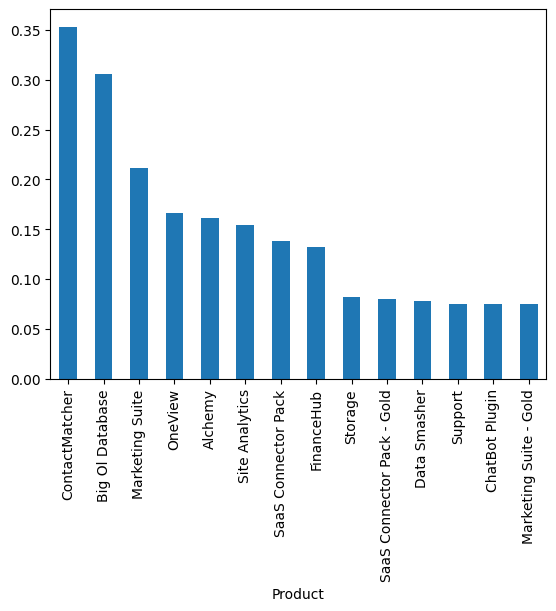

In [34]:
display(df.groupby('Product')['Discount'].mean().sort_values(ascending=False).plot(kind='bar'))

Produk Contact Matcher, Big Ol Database, Marketing menjadi 3 produk yang paling banyak diberikan diskon.


Produk Marketing Suite adalah produk ketiga teratas yang diberikan diskon paling banyak, kemungkinan ada korelasi antara pemberian diskon dan kenapa Marketing Suite menjadi produk yang berprofit minus.



## Menganalisa Produk yang tidak profit (Marketing Suite)

In [35]:
markSuite = df[df["Product"]== "Marketing Suite"]

markSuite.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
27,EMEA-2021-150630,2021-09-17,Neil Gill,France,Paris,EMEA,EU-WEST,Intel,1051,Tech,SMB,Marketing Suite,3083.4300,7,0.50,-1665.0522
38,APJ-2021-117415,2021-12-27,Jasmine Metcalfe,Japan,Tokyo,APJ,JAPN,Banco Santander,1101,Finance,Enterprise,Marketing Suite,532.3992,3,0.32,-46.9764
189,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,899.1360,4,0.20,112.3920
192,EMEA-2021-102281,2021-10-12,Dylan Ogden,United Kingdom,London,EMEA,UKIR,HonHai Precision Industry,1033,Tech,Enterprise,Marketing Suite,626.3520,3,0.20,46.9764


### Melihat history Sales Marketing Suite

In [36]:
markSuite['Order Month'] = markSuite['Order Date'].dt.to_period('M')
markSuite['Order Year'] = markSuite['Order Date'].dt.to_period('Y')

In [37]:
dfSales = markSuite.groupby('Order Month')[['Sales']].median().reset_index()
dfSales.sort_values(by='Sales', ascending=False).head(5)

,Order Month,Sales
16,2021-05,958.40875
12,2021-01,902.42380
6,2020-07,743.83650
9,2020-10,616.99800
11,2020-12,612.94000


5 data teratas produk Marketing Suite dari bulan yang paling banyak salesnya ke yang paling sedikit

### Membuat Time Series Sales Marketing Suite

Memformat nilai sales menjadi bentuk dollar dengan 1 angka dibelakang koma

In [38]:
dfSales['Sales'] = dfSales['Sales'].map('${:,.2f}'.format)
dfSales.head(3)

,Order Month,Sales
0,2020-01,$161.72
1,2020-02,$290.67
2,2020-03,$302.45


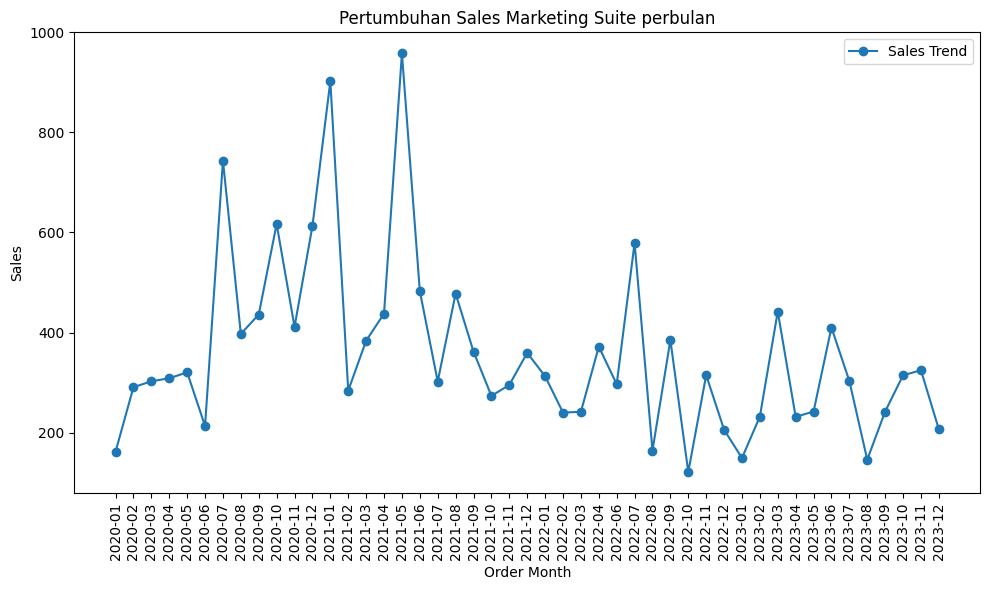

In [39]:
plt.figure(figsize=(10,6))
sales_values = dfSales['Sales'].str.replace('$', '').astype(float)
plt.plot(dfSales['Order Month'].astype(str), sales_values, marker='o', label='Sales Trend')

plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Pertumbuhan Sales Marketing Suite perbulan')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

* Mulai dari Juni 2020 sampai May 2021 produk mengalami pelonjakan sales pada periode tersebut

* Pada May 2021 menjadi bulan dengan sales paling besar dari semua periode waktu, menandakan bahwa strategi pejualan yang berhasil atau kondisi pasar yang sedang giat berhubung periode waktu itu adalah periode waktu covid yang membuat industri IT menjadi sangat melejit

* Pada Oktober 2022 menjadi bulan dengan sales paling kecil dari semua periode waktu, menandakan strategi sales yang kurang ampuh dan juga minat pasar yang sedang melemah berhubung pada periode waktu tersebut 'Tech Winter' sudah terjadi dimana terjadi kejenuhan di industri IT dengan para investor yang mulai enggan invest ke bidang IT dan banyaknya layoff


### Melihat history profit Marketing Suite

In [40]:
dfProfit = markSuite.groupby('Order Month')[['Profit']].median().reset_index()
dfProfit.sort_values(by='Profit', ascending=False).head(5)

,Order Month,Profit
6,2020-07,133.46930
29,2022-07,126.22500
16,2021-05,91.34125
7,2020-08,82.35430
13,2021-02,82.33680


5 data teratas produk Marketing Suite dari bulan yang paling banyak profitnya ke yang paling sedikit dan yang paling sedikit profitnya ke yang paling banyak profitnya

In [41]:
dfProfit.sort_values(by='Profit', ascending=True).head(5)

,Order Month,Profit
17,2021-06,-376.69320
12,2021-01,-340.93170
26,2022-03,-98.80180
4,2020-05,-94.81075
30,2022-08,-52.89080


5 data teratas produk Marketing Suite dari bulan yang paling sedikit profitnya ke yang paling banyak profitnya

### Membuat Time Series Profit Marketing Suite

In [42]:
dfProfit['Profit'] = dfProfit['Profit'].map('${:,.2f}'.format)

dfProfit.head()

,Order Month,Profit
0,2020-01,$-24.68
1,2020-02,$3.42
2,2020-03,$-12.10
3,2020-04,$-18.15
4,2020-05,$-94.81


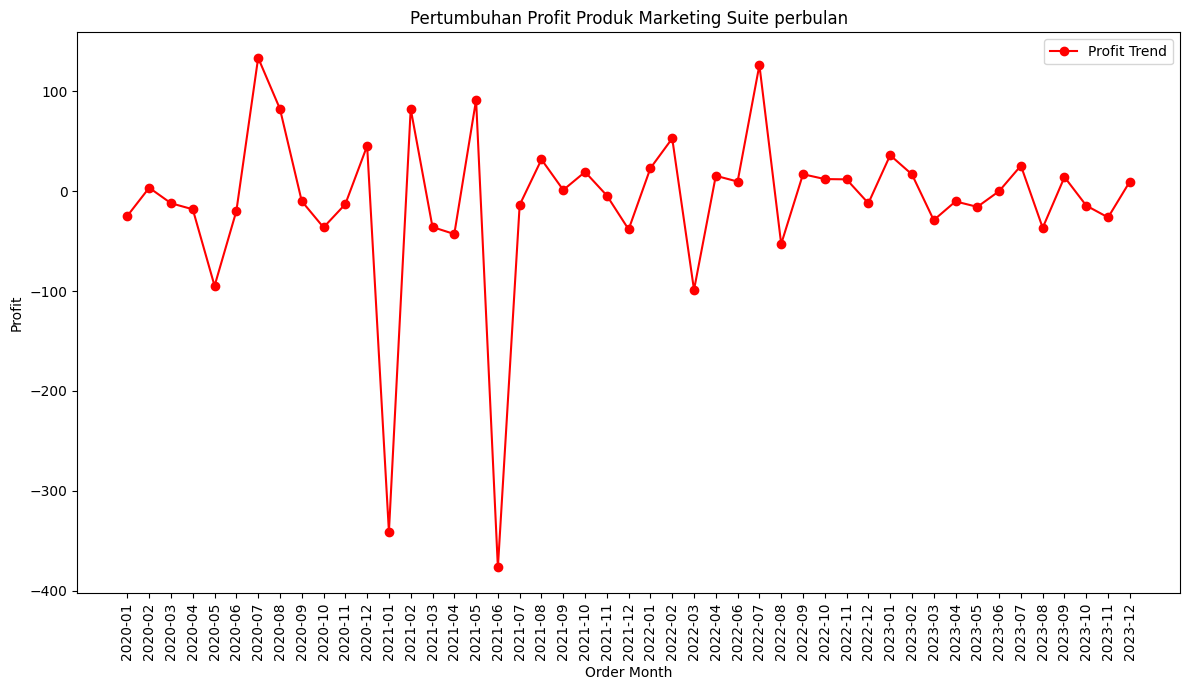

In [43]:
plt.figure(figsize=(12, 7))
profit_values = dfProfit['Profit'].str.replace('$', '').astype(float)
plt.plot(dfProfit['Order Month'].astype(str), profit_values, marker='o', linestyle='-',color='red', label='Profit Trend')

plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Pertumbuhan Profit Produk Marketing Suite perbulan')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Grafik diatas menunjukkan pertumbuhan profit Marketing Suite dari Januari 2020 sampai Desember 2023

* Pada Januari  2021 terjadi penurunan profit sampai merugi, hal ini tidak berkorelasi dengan sales yang pada bulan tersebut mengalami kenaikan.

* Pada Juni 2021 menjadi bulan dengan kerugian paling banyak dalam seluruh rentang waktu penjualan, pada bulan tersebut sales juga mengalami penurunan, meskipun pada bulan selanjutnya juga terjadi penurunan yang lebih banyak dibandingkan bulan tersebut.


### Melihat history Discount Marketing Suite

In [44]:
dfDiscount = markSuite.groupby('Order Month')[['Discount']].median().reset_index()

In [45]:
dfDiscount.sort_values(by='Discount', ascending=False).head(5)

,Order Month,Discount
26,2022-03,0.500
17,2021-06,0.500
12,2021-01,0.410
0,2020-01,0.325
4,2020-05,0.325


5 Bulan paling atas yang memberikan diskon paling banyak

In [46]:
dfDiscount['Discount'] = (dfDiscount['Discount']* 100).apply(lambda x: f"{x: .2f}")
dfDiscount.head(5)

,Order Month,Discount
0,2020-01,32.50
1,2020-02,15.00
2,2020-03,15.00
3,2020-04,15.00
4,2020-05,32.50


Rubah Format Diskon menjadi 0-100 persen

### Membuat Time Series Discount perbulan

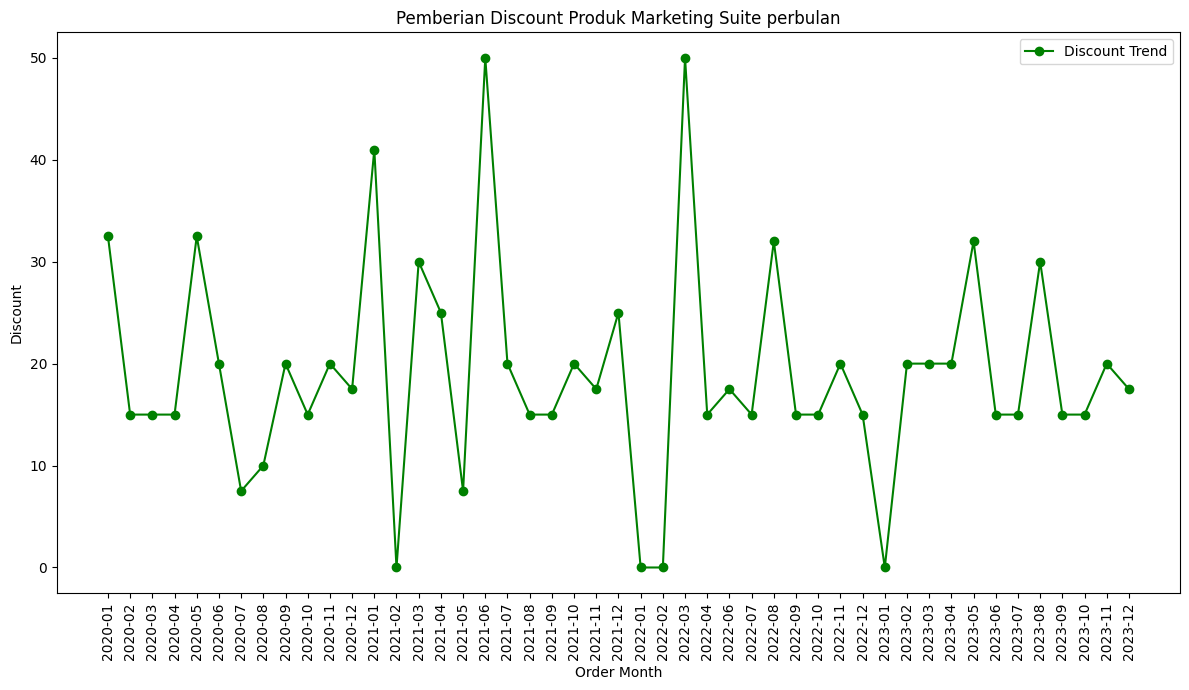

In [47]:
plt.figure(figsize=(12, 7))
discount_values = dfDiscount['Discount'].str.replace('%', '').astype(float)
plt.plot(dfDiscount['Order Month'].astype(str),discount_values, marker='o', linestyle='-',color='green', label='Discount Trend')

plt.xlabel('Order Month')
plt.ylabel('Discount')
plt.title('Pemberian Discount Produk Marketing Suite perbulan')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

Grafik diatas menunjukkan pemberian diskon produk Marketing Suite dari Januari 2020 sampai Desember 2023

* Februari 2021, Januari - Februari 2022, dan Januari 2021 tidak diberikan diskon sama sekali (0% Diskon)

* Januari 2021, Juni 2021, dan Maret 2022 adalah bulan dengan pemberian diskon terbanyak.




###Poin poin yang didapat
* Penurunan Profit pada Januari 2021 tidak selaras dengan kenaikan Sales pada bulan tersebut, namun padahal pada bulan tersebut diberikan diskon yang cukup besar (40%)

* Pada Mei 2021 terjadi kenaikan Profit yang tinggi, ini dibarengi dengan pemberian diskon dan kenaikan sales yang tinggi pada bulan tersebut.

* Profit yang didapat pada Januari - Februari 2022 dan Januari 2023 cukup tinggi meskipun tidak ada diskon yang diberikan pada bulan tersebut (0%), perlu dicatat dengan sedikitnya diskon yang diberikan maka sales akan menurun.

Dengan melihat Pertumbuhan Sales, Profit, dan Pemberian Diskon perbulannya kita dapat mengasumsikan perlu adanya strategi pemberian diskon yang cukup untuk meningkatkan sales namun tidak membuat Profit menurun.

Namun sebelum itu kita harus melihat korelasi dari masing-masing variabel.

## Analisa Korelasi

### Korelasi antar kolom

In [48]:
numerical.corr(method ='spearman')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327566,-0.057127,0.518682
Quantity,0.327566,1.000000,-0.000737,0.234409
Discount,-0.057127,-0.000737,1.000000,-0.543221
Profit,0.518682,0.234409,-0.543221,1.000000


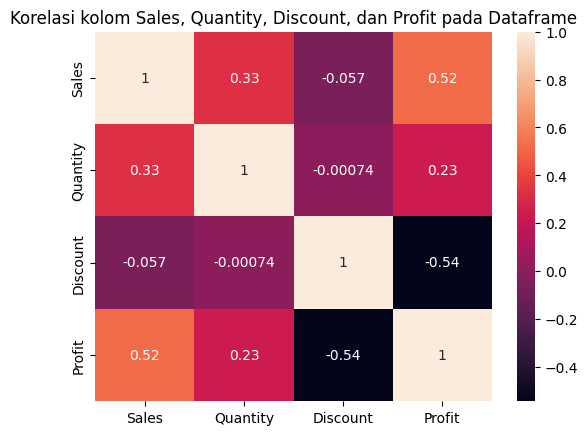

In [49]:
dataplot = sns.heatmap(numerical.corr(method='spearman'), annot=True)

plt.title("Korelasi kolom Sales, Quantity, Discount, dan Profit pada Dataframe")
plt.show()

* `Sales` dan `Profit` memiliki korelasi yang paling besar

* `Sales` dengan `Discount` memiliki korelasi negatif yang dapat diasumsikan semakin banyak diskon maka semakin sedikit nilai total penjualan yang didapat

* `Profit` dengan `Discount` juga memiliki korelasi negatif, dapat diasumsikan bahwa dengan adanya diskon maka perusahaan tidak mendapatkan profit atau malah merugi

* `Quantity` dengan `Discount` tidak memiliki korelasi yang signifikan, seharusnya apabila penjual memberikan diskon, pembeli akan membeli produk dalam jumlah yang banyak, namun dengan korelasi yang tidak signifikan ini menunjukkan bahwa pembeli tidak terlalu memiliki daya tarik untuk membeli produk dalam jumlah banyak meski diberikan diskon

### Korelasi antar kolom hanya pada produk Marketing Suite

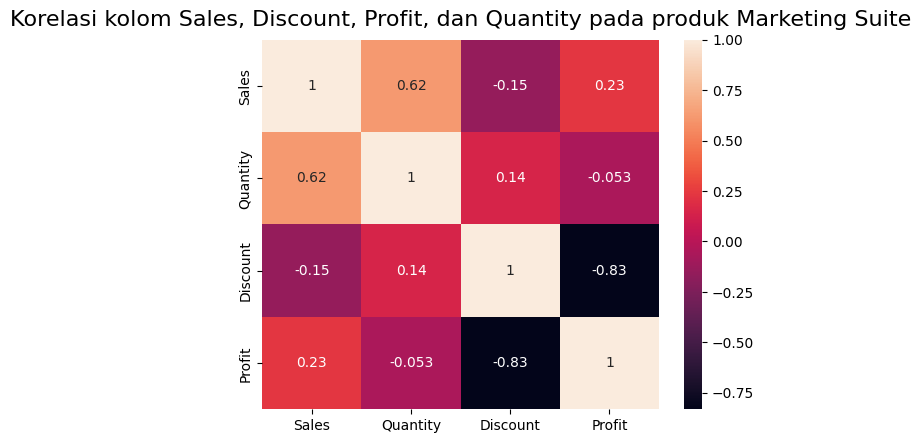

In [50]:
numerical_markSuite = markSuite[['Sales', 'Quantity', 'Discount', 'Profit']]

dataplot = sns.heatmap(numerical_markSuite.corr(method='spearman'), annot=True)

plt.title("Korelasi kolom Sales, Discount, Profit, dan Quantity pada produk Marketing Suite",size=16, pad=10)
plt.show()

Untuk Korelasi Produk Marketing Suite

* `Sales` memiliki korelasi yang kecil terhadap `Profit`, hal ini menunjukkan bahwa meskipun sering terjadinya pembelian namun profit yang didapatkan tidaklah signifikan.

* `Sales` memiliki korelasi negatif terhadap `Discount`, menunjukkan bahwa meskipun produk sudah diberikan diskon namun malah semakin sedikit penjualan yang terjadi.

* `Discount` dan `Profit` memiliki korelasi negatif yang cukup besar, menunjukkan bahwa semakin banyak diskon yang diberikan maka profit mengalami kerugian yang cukup besar.

* `Discount` dan `Quantity` memiliki korelasi yang kecil, menunjukkan bahwa meskipun produk sudah diberikan diskon customer cenderung tetap tidak tertarik untuk membeli produk tersebut dalam jumlah banyak.

## Segmentasi Customer

### RFM

RFM adalah Recency, Frequency, dan Monetary

Recency menggambarkan waktu pelanggan berinteraksi dengan produk, frequency berkaitan dengan seberapa sering mereka melakukan pembelian, dan monetary value berkaitan dengan jumlah uang yang dikeluarkan.

Dalam konteks data ini, kita dapat menganalisa RFM dari tiap segment yang melakukan pembelian.

Menghitung Recency masing-masing segment

In [51]:
df_recency = df.groupby(by='Segment',
                        as_index=False)['Order Date'].max()
df_recency.columns = ['Segment', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,Segment,LastPurchaseDate,Recency
0,Enterprise,2023-12-31,0
1,SMB,2023-12-31,0
2,Strategic,2023-12-31,0


Menghitung Frequency

Disini kita menghitung banyaknya pembelian yang dilakukan tiap segment

In [52]:
frequency_df = df.drop_duplicates().groupby(
    by=['Segment'], as_index=False)['Order Date'].count()
frequency_df.columns = ['Segment', 'Frequency']
frequency_df.head()

,Segment,Frequency
0,Enterprise,1782
1,SMB,5191
2,Strategic,3020


Menghitung Monetary Value

Disini kita menghitung Monetary Value (Besar nilai transaksi) dari tiap segment yang membeli produk

In [53]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Segment', as_index=False)['Total'].sum()
monetary_df.columns = ['Segment', 'Monetary']
monetary_df.head()

,Segment,Monetary
0,Enterprise,2.152044e+06
1,SMB,5.819347e+06
2,Strategic,3.516108e+06


Merge column Recency, Frequency, dan Monetary

In [54]:
fm = monetary_df.merge(frequency_df, on='Segment')
rfm_df = fm.merge(df_recency, on='Segment')

Melihat ranking dari recency, frequency, dan monetary score

In [55]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()

,Segment,Monetary,Frequency,LastPurchaseDate,Recency,R_rank_norm,F_rank_norm,M_rank_norm
0,Enterprise,2.152044e+06,1782,2023-12-31,0,100.0,33.333333,33.333333
1,SMB,5.819347e+06,5191,2023-12-31,0,100.0,100.000000,100.000000
2,Strategic,3.516108e+06,3020,2023-12-31,0,100.0,66.666667,66.666667


Menghitung score RFM

Score RFM dihitung berdasarkan nilai recency, frequency, dan monetary value yang sudah di normalisasi

Rumus untuk menghitung rfm score adalah:

(0.15 x Recency Score) + (0.28 x Frequency Score) + (0.57 x Monetary Score)

Setelah menghitung lalu kita langsung dapat memberikan rating berdasarkan RFM score yang diperoleh, rating adalah sebagai berikut :

* rfm score >4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4 > rfm score > 3 : Medium value customer
* 3 > rfm score> 1.6 : Low-value customer
* rfm score < 1.6 : Lost Customer

In [56]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_df["Customer_segment"] = np.where(
    rfm_df['RFM_Score'] > 4.5, "Top Customers",  (
        np.where(
            rfm_df['RFM_Score'] > 4, "High value Customer", (np.where(
            rfm_df['RFM_Score'] > 3, "Medium Value Customer", np.where(
            rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))

rfm_df[['Segment', 'RFM_Score', 'Customer_segment']].head(20)

,Segment,RFM_Score,Customer_segment
0,Enterprise,2.17,Low Value Customers
1,SMB,5.00,Top Customers
2,Strategic,3.58,Medium Value Customer


Dari penghitungan nilai RFM diatas dapat diperoleh hasil :

* Enterprise adalah Low Value Customer
* SMB adalah Top Customer
* Strategic adalah Medium Value Customer

Dari hasil testing diatas p-value yang dihasilkan adalah 0.17 yang berarti p-value > alpha. Menunjukkan tidak adanya perbedaan rata-rata profit dari semua segment.

Hal ini juga menunjukkan bahwa semua segment (SMB, Strategic, dan Enterprise) tidak ada yang lebih menonjol ataupun tidak menonjol dalam segi profit.

### Profit per Region dari produk Marketing Suite

In [57]:
dfRegion = markSuite.groupby('Region')['Profit'].sum().sort_values(ascending=False).reset_index()
dfRegion.head()

,Region,Profit
0,AMER,52.7756
1,EMEA,-1629.6682
2,APJ,-1895.6634


AMER menjadi satu satunya region yang memperoleh untung, EMEA dan APJ menjadi region yang memberikan kerugian.

* AMER adalah region satu satunya yang memberikan profit sebesar $52

* EMEA merugi sebesar $1629

* APJ merugi sebesar $1895



<BarContainer object of 3 artists>

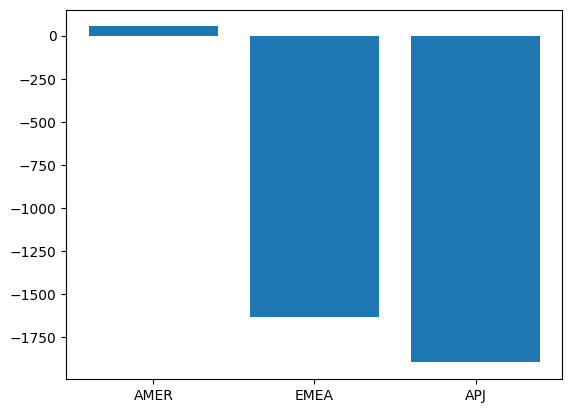

In [58]:
plt.bar(dfRegion['Region'], dfRegion['Profit'])
# plt.title(label='Top 5 Subregion Profit Rendah')

### Profit per Sub-Region dari produk Marketing Suite

In [59]:
dfSubregion = markSuite.groupby('Subregion')['Profit'].sum().reset_index()
Top_Subreg = dfSubregion.sort_values(by='Profit', ascending=False)
Top_Subreg.head()

,Subregion,Profit
8,NAMER,1988.9969
7,MEA,1854.2242
1,APAC,1051.3469
9,NOR,914.7602
2,EU,650.7630


Subregion Namer, MEA, APAC, NOR, EU menjadi Subregion dengan Profit tertinggi

In [60]:
Bot_Subreg = dfSubregion.sort_values(by='Profit', ascending=True)
Bot_Subreg.head()

,Subregion,Profit
4,EU-WEST,-3257.8735
5,JAPN,-2391.1377
3,EU-EAST,-2184.3301
6,LATAM,-1936.2213
0,ANZ,-555.8726


Subregion EU-WEST, JAPN, EU-EAST, LATAM, ANZ menjadi Subregion dengan Profit rugi Tertinggi

Text(0.5, 1.0, 'Top 5 Subregion Profit Rendah')

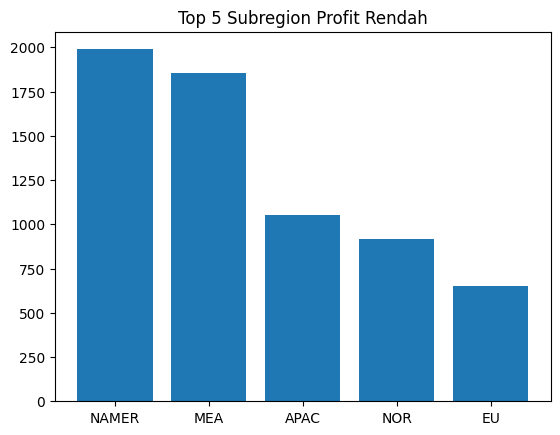

In [61]:
Subreg_low = Bot_Subreg['Subregion'].head().tolist()
Subreg_high = Top_Subreg['Subregion'].head().tolist()

plt.bar(Subreg_high, Top_Subreg['Profit'].head())
plt.title(label='Top 5 Subregion Profit Rendah')

Text(0.5, 1.0, 'Top 5 Subregion Profit Rendah')

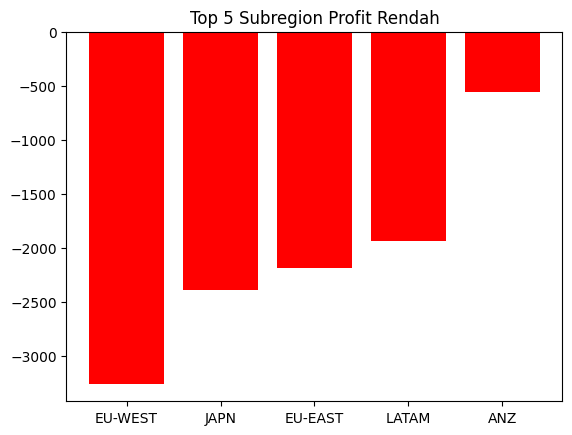

In [62]:
plt.bar(Subreg_low, Bot_Subreg['Profit'].head(), color='red')
plt.title(label='Top 5 Subregion Profit Rendah')

### Profit per Country dari produk Marketing Suite

In [63]:
dfCountry = markSuite.groupby('Country')['Profit'].sum().reset_index()
dfCountry_low = dfCountry.sort_values(by='Profit', ascending=True)
dfCountry_high = dfCountry.sort_values(by='Profit', ascending=False)

In [64]:
dfCountry_high.head()

,Country,Profit
32,United States,1418.9915
9,Egypt,1013.1270
10,Finland,883.2620
15,Italy,650.7630
4,Canada,570.0054


United States, Egypt, Finland, Italy, dan Canada menjadi negara yang memiliki profit paling tinggi

In [65]:
dfCountry_low.head()

,Country,Profit
11,France,-2896.7601
21,Russia,-2408.9163
16,Japan,-2391.1377
17,Mexico,-1359.0516
5,Chile,-869.2073


France, Russia, Japan, Mexico, dan Chile menjadi negara yang memberikan kerugian profit yang paling besar.

Text(0.5, 1.0, 'Top 5 Negara Profit Tinggi')

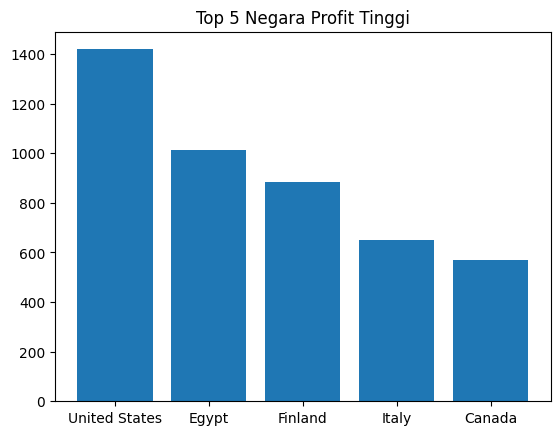

In [66]:
CountryList_low = dfCountry_low['Country'].head().tolist()
CountryList_high = dfCountry_high['Country'].head().tolist()

plt.bar(CountryList_high, dfCountry_high['Profit'].head())
plt.title(label='Top 5 Negara Profit Tinggi')

Text(0.5, 1.0, 'Top 5 Negara Profit Terendah')

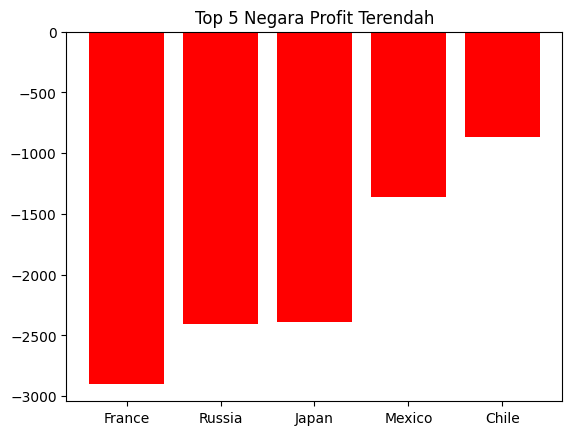

In [67]:
plt.bar(CountryList_low, dfCountry_low['Profit'].head(),color='red')
plt.title(label='Top 5 Negara Profit Terendah')

### Segmen Customer

In [68]:
markSuite["Segment"].value_counts()

Segment
SMB           131
Strategic      64
Enterprise     33
Name: count, dtype: int64

In [69]:
lab = markSuite["Segment"].unique().tolist()
lab

['SMB', 'Enterprise', 'Strategic']

In [70]:
percentage = markSuite["Segment"].value_counts()/len(df)
percentage.values

array([0.01310918, 0.00640448, 0.00330231])

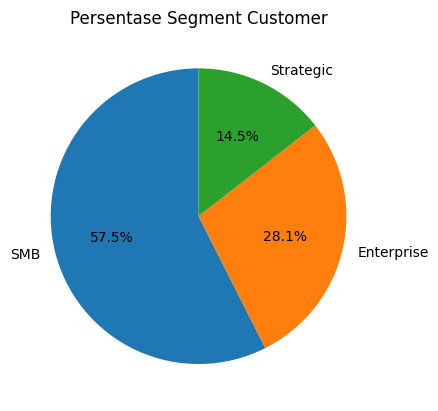

In [71]:
plt.pie(
    percentage.values,
    labels=lab,
    autopct= '%1.1f%%',
    startangle=90,
    )
plt.title("Persentase Segment Customer")
plt.show()

Dalam segmentasi customer produk Marketing Suite dapat dilihat:

* SMB menjadi segmen customer yang paling banyak di 57,5%

* Enterprise memiliki persentase sebanyak 28,1%

* Strategic menjadi segmen yang persentasenya paling sedikit di 14,5%

In [72]:
 dfSegmentsProfit = markSuite.groupby('Segment')[['Profit']].median().reset_index()

 dfSegmentsProfit.sort_values(by='Profit', ascending=False)

,Segment,Profit
0,Enterprise,15.6978
2,Strategic,8.7482
1,SMB,-6.0490


Profit Marketing Suite dari tiap segment

* Enterprise memperoleh Profit sebesar $15

* Strategic memperoleh Profit sebesar 8$

* SMB menjadi satu satunya segment yang memberikan kerugian sebesar 6$

In [73]:
dfCustomerSegments = markSuite.groupby('Segment')['Customer'].unique().reset_index()
dfCustomerSegments

,Segment,Customer
0,Enterprise,"[Banco Santander, HonHai Precision Industry, S..."
1,SMB,"[Chevron, Intel, Sysco, Bank of America Corp.,..."
2,Strategic,"[Tyson Foods, Amazon, Wells Fargo, Volkswagen,..."


Daftar Customer dan Segmentnya masing-masing untuk produk Marketing Suite

### Uji Statistika Inferensial

### Hipotesis Testing
Pada data yang kategorik dan terdapat lebih dari 2 segment, kita dapat menggunakan ANOVA untuk melihat apakah mean dari profit itu berbeda dari tiap segmentnya.

Maka dari itu kita menentukan Null hipotesis (H0) dan Alternative hipotesis (Ha):

* H0 = Mean dari profit atas semua segment cenderung mirip/tidak banyak perbedaan (Tidak ada perbedaan rata-rata profit dari segment SMB, Strategic, dan Enterprise)

* Ha = Rata-rata Profit dari semua segment ada yang berbeda setidaknya 1.



In [74]:
smbTest = markSuite[markSuite['Segment'] == 'SMB']['Profit']
strategicTest = markSuite[markSuite['Segment'] == 'Strategic']['Profit']
enterpriseTest = markSuite[markSuite['Segment'] == 'Enterprise']['Profit']

h_stat, p_value = kruskal(smbTest, strategicTest, enterpriseTest)

print(f"Nilai H-statistic: {h_stat}\nNilai P-value: {p_value}\n")

alpha = 0.05

if p_value < alpha:
  print("H0 Ditolak")
  print("Rata-rata Profit dari semua segment ada yang berbeda setidaknya 1")

else:
  print("H0 Diterima")
  print("Tidak ada perbedaan rata-rata profit dari semua segment")

Nilai H-statistic: 3.4601394644340844
Nilai P-value: 0.17727204796594362

H0 Diterima
Tidak ada perbedaan rata-rata profit dari semua segment


# Kesimpulan

Marketing Suite dalam Sales Amazon Web Service menunjukkan minus profit yang masih terjadi, Diperlukan tindakan pencegahan secara segera dalam masalah ini.

Marketing Suite dalam analisa data yang dilakukan menunjukkan bahwa ada beberapa alasan yang menjadi penyebab minus profit di produk tersebut

Berikut adalah rekomendasi yang perlu dilakukan:

* **Strategi diskon yang efektif**.
Perlu adanya strategi pemberian diskon yang cukup untuk meningkatkan Sales namun juga tidak membuat Profit menurun.

* **Fokus ke segmen yang mengalami minus profit pada produk Marketing Suite**.
Cari tahu apa yang menyebabkan terjadinya penurunan di segmen SMB, sebagai segmen yang paling besar diperlukan strategi marketing yang lebih efektif dan spesifik untuk segmen tersebut.

* **Strategi Sales tanpa diskon**.
Fokus menjual produk tanpa harus menggunakan diskon, dikarenakan ada beberapa periode waktu yang memiliki Profit yang cukup tinggi meskipun tidak diberikan diskon, dalam catatan bahwa Sales pasti akan menurun.

* **Buat insentif yang berbeda di tiap segment berdasarkan RFM nya**
Untuk Segment yang memiliki RFM Score tinggi dapat memberikan bonus bonus loyalty atau penawaran ekslusif, untuk Segment yang memiliki RFM Score rendah mungkin dapat ditargetkan untuk membuat campaign yang dapat menarik daya beli segment tersebut